In [3]:
from funcs.notebook import *

In [4]:
df = pd.read_csv("../results/2020_02_obsdurs.csv")
df = df.drop_duplicates(subset="ID",keep="first")

In [6]:
df.ID.head(30)

0            GJ 1132
2            HATS-68
4           HD 15337
7          HD 213885
10          HD 23472
31           L 168-9
33           L 98-59
42          LHS 1140
44          LHS 1815
61     TIC 410214986
64        HD 41004 A
67           TOI-837
69       Kepler-1229
75           GJ 1061
79          WASP-100
95        Kepler-102
140     TIC 89256802
142       Kepler-411
158          GJ 3082
160        Kepler-93
203          TOI-169
206       Kepler-725
224       Kepler-504
245    TIC 318937509
246         WASP-117
250    TIC 348538431
251    TIC 238086647
254    TIC 278683844
270     TIC 15863518
271         WASP-164
Name: ID, dtype: object

In [7]:
# Composite Table of confirmed exoplanets
path = "20_01_2021_confirmed_uncontroversial_exoplanet_systems.csv"

print(f"[UP] Using confirmed and uncontroversial "
      "entries in NASA Composite Table from {path}")

exokepler = pd.read_csv(f"../data/{path}") # composite table

# read in TESS-TOI sample 
path = "../data/2021_01_13_TESS_TOI_CATALOG.csv"

print(f"[UP] Using TESS-TOI Table from {path}")

exotess = pd.read_csv(path, skiprows=4)

# rename the relevant columns for transit masking
exotess = exotess.rename(index=str, 
                         columns={'Transit Duration Value':"pl_trandur",
                                  'Orbital Period Value': "pl_orbper", 
                                  'Epoch Value':"pl_tranmidepoch"})

[UP] Using confirmed and uncontroversial entries in NASA Composite Table from {path}
[UP] Using TESS-TOI Table from ../data/2021_01_13_TESS_TOI_CATALOG.csv


In [8]:
exokepler_withflares = exokepler.merge(df, how="inner", left_on="hostname", right_on="ID")

In [9]:
exokepler_withflares.hostname.unique().shape

(102,)

(0.0, 90.0)

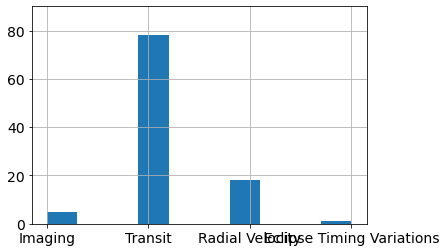

In [10]:
exokepler_withflares.discoverymethod.hist()
plt.ylim(0,90)


In [13]:
exokepler_withflares.columns.values

array(['hostname', 'rowid', 'pl_name', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_id', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag',
       'discoverymethod', 'disc_year', 'disc_refname', 'disc_pubdate',
       'disc_locale', 'disc_facility', 'disc_telescope',
       'disc_instrument', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag',
       'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag',
       'dkin_flag', 'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbper_reflink', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_orbsmax_reflink', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2',
       'pl_radelim', 'pl_rade_reflink', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_radj_reflink', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim',
       'pl_bmasse_reflink', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassj_reflink'

In [11]:
df["TIC"] = df.ID.str[3:] 
df["istic"] = (df.ID.str[:3] == "TIC")

In [14]:
dftic = df[df.istic]
dftic.TIC = dftic.TIC.astype(int)

In [19]:
exotess_withflares = exotess.merge(dftic, how="inner", on="TIC")
exotess_withflares["discoverymethod"] = "Transit"

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

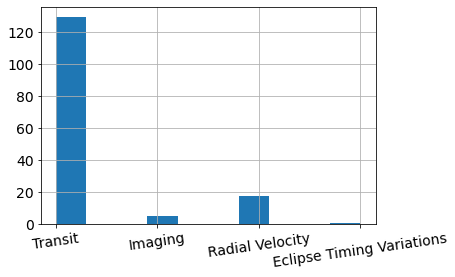

In [27]:
s = pd.concat([exotess_withflares.discoverymethod, exokepler_withflares.discoverymethod] )
s.hist()
# plt.ylim(0,90)
plt.xticks(rotation=8)

In [41]:
print(str(exokepler_withflares[(exokepler_withflares.discoverymethod=="Imaging")].hostname.values))

['2MASS J01225093-2439505' '2MASS J02192210-3925225' '51 Eri' 'GU Psc'
 'VHS J125601.92-125723.9']


In [69]:
pd.options.display.max_colwidth =130
exokepler_withflares.loc[exokepler_withflares.discoverymethod=="Radial Velocity",
                         ["hostname",#'pl_orbeccen', 'pl_orbeccenerr1','pl_orbeccenerr2',"pl_orbeccen_reflink",
                           "pl_orbtper", "pl_orbtpererr1", 
                          "pl_orbtpererr2","pl_orblper", "pl_orblpererr1",
                          "pl_orblpererr2", "pl_orblper_reflink","pl_orbtper_reflink","pl_orbeccen_reflink"]].to_csv("../inter.csv")

In [51]:
exokepler_withflares.columns.values

array(['hostname', 'rowid', 'pl_name', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_id', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag',
       'discoverymethod', 'disc_year', 'disc_refname', 'disc_pubdate',
       'disc_locale', 'disc_facility', 'disc_telescope',
       'disc_instrument', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag',
       'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag',
       'dkin_flag', 'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbper_reflink', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_orbsmax_reflink', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2',
       'pl_radelim', 'pl_rade_reflink', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_radj_reflink', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim',
       'pl_bmasse_reflink', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassj_reflink'

In [10]:
# exotess_withflares.groupby("TIC").count()

In [55]:
# df[df.istic].ID.values

array(['TIC 410214986', 'TIC 89256802', 'TIC 318937509', 'TIC 348538431',
       'TIC 238086647', 'TIC 278683844', 'TIC 15863518', 'TIC 42015200',
       'TIC 278866211', 'TIC 180695581', 'TIC 366563452', 'TIC 93125144',
       'TIC 409934330', 'TIC 44797824', 'TIC 278198753', 'TIC 420112587',
       'TIC 459837008', 'TIC 67646988', 'TIC 459970307', 'TIC 368287008',
       'TIC 299798795', 'TIC 264544388', 'TIC 8348911', 'TIC 101230735',
       'TIC 262530407', 'TIC 142090065', 'TIC 236714379', 'TIC 115623434',
       'TIC 259962054', 'TIC 328350926', 'TIC 236387002', 'TIC 32090583',
       'TIC 224298134', 'TIC 138968089', 'TIC 257605131', 'TIC 32830028',
       'TIC 2760710', 'TIC 198385543', 'TIC 235037761', 'TIC 120916706',
       'TIC 377293776', 'TIC 13684720', 'TIC 272086159', 'TIC 233120979',
       'TIC 161032923', 'TIC 206609630', 'TIC 52280468', 'TIC 77951245',
       'TIC 310231275', 'TIC 233211762'], dtype=object)

In [56]:
 df[df.istic].shape, df[~df.istic].shape

((50, 8), (102, 8))